# ENEXIS Graduation Project

#### Takes one of the CBS Datasets Kerncijfers wijken en buurten datasets and transforms it for merging with PV installed capacity dataset


# CRISP-DM Phase 2: Data Understanding - CBS Data

### Collect Initial Data

In [1]:
import cbsodata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nbconvert
pd.set_option('display.max_rows', 150)
pd.options.mode.chained_assignment = None  # default='warn'

Lets select a data set from CBS. One of the most comprehensive sets is "Kerncijfers wijken en buurten" which is actualized every year. It contains demographical data but also some data related to energy consumption, which can be linked to Enexis data via CBS area codes (Gemeente, Wijk and Buurt level). "Kerncijfers wijken en buurten 2019" is the most recent set containing largely complete data. In the sets of 2020 and 2021 many feature columns are yet empty.

In [2]:
datasets = (
'85039NED', #Kerncijfers wijken en buurten 2021
'84799NED', #Kerncijfers wijken en buurten 2020
'84583NED', #Kerncijfers wijken en buurten 2019
'84286NED', #Kerncijfers wijken en buurten 2018
'83765NED', #Kerncijfers wijken en buurten 2017
'83487NED' #Kerncijfers wijken en buurten 2016
)

In [3]:
data_years = {'85039NED' : 2021,
              '84799NED' : 2020,
              '84583NED' : 2019, 
              '84286NED' : 2018,
              '83765NED' : 2017,
              '83487NED' : 2016}

### Create a dataset with number of households by buurt by year

First, make a list of gemeenten in Enexis zone

In [4]:
c_path = "./data/"
v_file = "Gemeenten_Enexis" 

In [5]:
gem_Enexis     = pd.read_csv(filepath_or_buffer = c_path + v_file + ".csv",
                      encoding           = 'UTF-8')

In [6]:
gem_Enexis = gem_Enexis['0'].tolist()

Uploading CBS Kerncijfers datasets of 2016 - 2021, merging them, filtering out gemeenten belonging to the Enexis zone and filtering out number of households. 

In [7]:
df_households = pd.DataFrame()
for i in range(len(datasets)):
    df_new = pd.DataFrame(cbsodata.get_data(datasets[i]))
    df_new = df_new.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    df_new = df_new[df_new['SoortRegio_2'] == 'Buurt']
    df_new = df_new[df_new['Gemeentenaam_1'].isin(gem_Enexis)]
    df_new = df_new.loc[:,['Codering_3','HuishoudensTotaal_28', 'IndelingswijzigingWijkenEnBuurten_4']]
    df_new['Year'] = data_years[datasets[i]]
    df_households = pd.concat([df_households, df_new], axis = 0)
df_households.to_csv(path_or_buf = c_path + 'CBS_Households.csv', index = False)

In [8]:
df_households     = pd.read_csv(filepath_or_buffer = c_path + 'CBS_Households' + ".csv",
                      encoding           = 'UTF-8')

In [9]:
df_households = df_households.sort_values(['Codering_3', 'Year'])

In [10]:
df_households.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29146 entries, 26313 to 4892
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Codering_3                           29146 non-null  object
 1   HuishoudensTotaal_28                 29146 non-null  int64 
 2   IndelingswijzigingWijkenEnBuurten_4  29146 non-null  int64 
 3   Year                                 29146 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [11]:
df_households.describe(include = 'all')

,Codering_3,HuishoudensTotaal_28,IndelingswijzigingWijkenEnBuurten_4,Year
count,29146,29146.000000,29146.000000,29146.000000
unique,5669,NaN,NaN,NaN
top,BU00140000,NaN,NaN,NaN
freq,6,NaN,NaN,NaN
mean,NaN,529.667707,1.135696,2018.611954
std,NaN,709.678758,0.485307,1.690205
min,NaN,0.000000,1.000000,2016.000000
25%,NaN,65.000000,1.000000,2017.000000
50%,NaN,240.000000,1.000000,2019.000000
75%,NaN,730.000000,1.000000,2020.000000


In [12]:
df_households.isna().sum()

Codering_3                             0
HuishoudensTotaal_28                   0
IndelingswijzigingWijkenEnBuurten_4    0
Year                                   0
dtype: int64

In [13]:
df_households['IndelingswijzigingWijkenEnBuurten_4'].value_counts()

1    26914
3     1723
2      509
Name: IndelingswijzigingWijkenEnBuurten_4, dtype: int64

Only buurten with no changes in demarcation will be taken into account (variable IndelingswijzigingWijkenEnBuurten_4 must be equal to 1 or be missing value).

In [14]:
df_households = df_households[df_households['IndelingswijzigingWijkenEnBuurten_4'] == 1]

In [15]:
df_households.describe(include = 'all')

,Codering_3,HuishoudensTotaal_28,IndelingswijzigingWijkenEnBuurten_4,Year
count,26914,26914.000000,26914.0,26914.000000
unique,5515,NaN,NaN,NaN
top,BU00140000,NaN,NaN,NaN
freq,6,NaN,NaN,NaN
mean,NaN,540.950435,1.0,2018.639741
std,NaN,722.749239,0.0,1.694224
min,NaN,0.000000,1.0,2016.000000
25%,NaN,65.000000,1.0,2017.000000
50%,NaN,245.000000,1.0,2019.000000
75%,NaN,750.000000,1.0,2020.000000


In [16]:
# Creating a table with number of households by year in columns, and the buurt as index
df_households_pivot = df_households.pivot(index='Codering_3', columns='Year')['HuishoudensTotaal_28']

In [17]:
df_households_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5515 entries, BU00140000 to BU19691709
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2016    3909 non-null   float64
 1   2017    4134 non-null   float64
 2   2018    4430 non-null   float64
 3   2019    4646 non-null   float64
 4   2020    4861 non-null   float64
 5   2021    4934 non-null   float64
dtypes: float64(6)
memory usage: 301.6+ KB


In [18]:
df_households_pivot.head()

Year,2016,2017,2018,2019,2020,2021
Codering_3,,,,,,
BU00140000,3565.0,3595.0,3595.0,3540.0,3485.0,3640.0
BU00140001,5195.0,5290.0,5320.0,5225.0,5185.0,5135.0
BU00140002,3045.0,3115.0,3160.0,3120.0,3400.0,3305.0
BU00140003,1370.0,1415.0,1395.0,1405.0,1355.0,1390.0
BU00140004,5.0,5.0,5.0,5.0,5.0,5.0


In [19]:
df_households_pivot.describe()

Year,2016,2017,2018,2019,2020,2021
count,3909.000000,4134.000000,4430.000000,4646.000000,4861.000000,4934.000000
mean,580.244308,554.424286,549.753950,517.982135,527.387369,525.616133
std,782.928481,739.964782,721.554391,701.300431,706.755348,693.175265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,65.000000,70.000000,65.000000,65.000000,65.000000
50%,255.000000,245.000000,265.000000,235.000000,235.000000,240.000000
75%,805.000000,780.000000,770.000000,710.000000,725.000000,730.000000
max,7260.000000,6855.000000,6880.000000,6935.000000,6955.000000,5625.000000


In [20]:
df_households_pivot.isna().sum()

Year
2016    1606
2017    1381
2018    1085
2019     869
2020     654
2021     581
dtype: int64

Very large number of buurten has missing number of households, and the number of missing households increases moving back in time. It may be explained by changes in buurten introduced over time.

We shall take into account only buurten which had complete number of households in years 2016 - 2021. We will filter only these buurten and create the pivot again.

Let's remove all buurten which have incomplete number of household data over years

In [21]:
buurten_full = df_households_pivot.dropna()

In [22]:
# List of buurten with full number of households in 2016 - 2021
buurten_full = buurten_full.index.tolist()

In [23]:
df_households_full = df_households[df_households['Codering_3'].isin(buurten_full)]

In [24]:
df_households_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18090 entries, 26313 to 1256
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Codering_3                           18090 non-null  object
 1   HuishoudensTotaal_28                 18090 non-null  int64 
 2   IndelingswijzigingWijkenEnBuurten_4  18090 non-null  int64 
 3   Year                                 18090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 706.6+ KB


In [25]:
df_households_pivot = df_households_full.pivot(index='Codering_3', columns='Year')['HuishoudensTotaal_28']

In [26]:
df_households_pivot.head()

Year,2016,2017,2018,2019,2020,2021
Codering_3,,,,,,
BU00140000,3565,3595,3595,3540,3485,3640
BU00140001,5195,5290,5320,5225,5185,5135
BU00140002,3045,3115,3160,3120,3400,3305
BU00140003,1370,1415,1395,1405,1355,1390
BU00140004,5,5,5,5,5,5


In [27]:
df_households_pivot.isna().sum()

Year
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
dtype: int64

In [28]:
df_households_pivot['Household_increase'] = (df_households_pivot[2021] - df_households_pivot[2016]) / df_households_pivot[2021]

There can be nan's, they need to be removed

In [29]:
df_households_pivot.describe()

Year,2016,2017,2018,2019,2020,2021,Household_increase
count,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,2923.000000
mean,580.213930,585.203980,589.202322,593.222222,597.441128,600.126036,-inf
std,762.682242,767.823495,772.800345,775.228421,778.048147,776.287456,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
25%,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,0.000000
50%,255.000000,255.000000,265.000000,270.000000,275.000000,275.000000,0.014778
75%,825.000000,835.000000,842.500000,845.000000,855.000000,857.500000,0.062500
max,5885.000000,5870.000000,5890.000000,5830.000000,5830.000000,5625.000000,1.000000


This stage is almost finished but still needs to be completed, i.e. filter out buurts with e.g. Household increase higher than e.g. 10%

### EDA of 2019 Kerncijfers dataset

In [30]:
selected_dataset = datasets[2]

In [31]:
df_orig = pd.DataFrame(cbsodata.get_data(selected_dataset))

In [32]:
df_orig.shape

(17114, 118)

In [33]:
df_orig.head(5).transpose()

,0,1,2,3,4
ID,0,1,2,3,4
WijkenEnBuurten,Nederland,Aa en Hunze,Wijk 00 Annen,Annen,Verspreide huizen Annen
Gemeentenaam_1,Nederland,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze
SoortRegio_2,Land,Gemeente,Wijk,Buurt,Buurt
Codering_3,NL00,GM1680,WK168000,BU16800000,BU16800009
IndelingswijzigingWijkenEnBuurten_4,.,.,1,1,1
AantalInwoners_5,17282163,25386,3595,3450,150
Mannen_6,8581086,12659,1755,1675,80
Vrouwen_7,8701077,12727,1845,1775,75
k_0Tot15Jaar_8,2739819,3462,570,555,15


In [34]:
#remove whitespaces from beginning and end of string column labels
df_orig = df_orig.apply(lambda x: x.str.strip() if x.dtype == "object" else x)   

### Create a subset of data to practice EDA

For further steps, I will create a subset with selected features.

Data on the level of Buurt are selected for EDA

In [35]:
df = df_orig[df_orig['SoortRegio_2'] == 'Buurt']

In [36]:
df['IndelingswijzigingWijkenEnBuurten_4'].value_counts() # just checking how many changes have been made since previous year

1    12003
3     1043
2      548
Name: IndelingswijzigingWijkenEnBuurten_4, dtype: int64

Some rows have 0 values for "HuishoudensTotaal_28" feature. To use this feature for feature engineering, I need to eliminate 0 values, so I replace them with 1. 

In [37]:
df['HuishoudensTotaal_28'].replace({0 : 1}, inplace = True)

In [38]:
df.head()

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,...,AfstandTotKinderdagverblijf_107,AfstandTotSchool_108,ScholenBinnen3Km_109,OppervlakteTotaal_110,OppervlakteLand_111,OppervlakteWater_112,MeestVoorkomendePostcode_113,Dekkingspercentage_114,MateVanStedelijkheid_115,Omgevingsadressendichtheid_116
3,3,Annen,Aa en Hunze,Buurt,BU16800000,1,3450,1675,1775,555,...,0.5,0.8,2.6,252,252,0,9468,1.0,5.0,407.0
4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,1,150,80,75,15,...,1.7,2.0,1.2,1226,1213,13,9468,1.0,5.0,59.0
6,6,Eext,Aa en Hunze,Buurt,BU16800100,1,1245,635,615,185,...,1.2,0.9,1.0,171,170,1,9463,1.0,5.0,144.0
7,7,Verspreide huizen Eext,Aa en Hunze,Buurt,BU16800109,1,175,90,85,10,...,2.0,2.1,1.3,1618,1611,6,9463,1.0,5.0,36.0
9,9,Anloo,Aa en Hunze,Buurt,BU16800200,1,335,165,170,35,...,2.2,0.4,2.0,57,57,0,9467,1.0,5.0,126.0


In order to use in the EDA, numeric features have to be intensive variables i.e. such which do not depend on the size of the system. For this reason, two new variables are created by dividing the existing extensive variables `AantalInkomensontvangers_70` and `BedrijfsvestigingenTotaal_91` by number of inhabitants and number of households, respectively. Another new variable is defined to describe average education level, as a kind of weighted average of `OpleidingsniveauLaag_64`, `OpleidingsniveauMiddelbaar_65` and `OpleidingsniveauHoog_66`, with respective weights of 1, 2 and 3. The new variable assumes values in the range of 1 to 3.

In [39]:
df['Gemiddeld_opleidingsniveau'] = (df['OpleidingsniveauLaag_64'] * 1 + df['OpleidingsniveauMiddelbaar_65'] * 2 + 
                                df['OpleidingsniveauHoog_66'] * 3) / (df['OpleidingsniveauLaag_64'] + 
                                df['OpleidingsniveauMiddelbaar_65'] + df['OpleidingsniveauHoog_66'])

In [40]:
df['Percent_inkomensontvangers'] = df['AantalInkomensontvangers_70'] / df['AantalInwoners_5']

In [41]:
df['Bedrijfsvestigingen_per_huishuidens'] = df['BedrijfsvestigingenTotaal_91'] / df['HuishoudensTotaal_28']

We now make a slice of the dataframe df, containing only the selected features, and the newly added features. The features are stored in a list object `Selected_CBS_features`.

In [42]:
Selected_CBS_features = ['WijkenEnBuurten',
 'Gemeentenaam_1',
 'SoortRegio_2',
 'Codering_3',
 'MeestVoorkomendePostcode_113',
 'HuishoudensTotaal_28',
 'GemiddeldeHuishoudensgrootte_32',
 'Bevolkingsdichtheid_33',
 'GemiddeldeWoningwaarde_35',
 'PercentageEengezinswoning_36',
 'Koopwoningen_40',
 'InBezitWoningcorporatie_42',
 'InBezitOverigeVerhuurders_43',
 'BouwjaarVanaf2000_46',
 'GemiddeldElektriciteitsverbruikTotaal_47',
 'GemiddeldAardgasverbruikTotaal_55',
 'Gemiddeld_opleidingsniveau',
 'Percent_inkomensontvangers',
 'Bedrijfsvestigingen_per_huishuidens',
 'PersonenautoSPerHuishouden_102',
 'AfstandTotSchool_108',
 'MateVanStedelijkheid_115']

In [53]:
df = df[Selected_CBS_features]

### Description of data

We now have the final set of features extracted from CBS dataset. Let's explore its main characteristics.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13594 entries, 3 to 17113
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   WijkenEnBuurten                           13594 non-null  object 
 1   Gemeentenaam_1                            13594 non-null  object 
 2   SoortRegio_2                              13594 non-null  object 
 3   Codering_3                                13594 non-null  object 
 4   MeestVoorkomendePostcode_113              13594 non-null  object 
 5   HuishoudensTotaal_28                      13594 non-null  int64  
 6   GemiddeldeHuishoudensgrootte_32           13252 non-null  float64
 7   Bevolkingsdichtheid_33                    12959 non-null  float64
 8   GemiddeldeWoningwaarde_35                 10284 non-null  float64
 9   PercentageEengezinswoning_36              12101 non-null  float64
 10  Koopwoningen_40                   

There is a hight amount of missing values, which will need to be handled later. For now we will perform an initial EDA with the set as it is.

In [55]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
WijkenEnBuurten,13594,12657,Centrum,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gemeentenaam_1,13594,355,Amsterdam,479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SoortRegio_2,13594,1,Buurt,13594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Codering_3,13594,13594,BU16800000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MeestVoorkomendePostcode_113,13594,3933,.,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HuishoudensTotaal_28,13594.0,NaN,NaN,NaN,581.593203,812.292583,1.0,70.0,290.0,790.0,14035.0
GemiddeldeHuishoudensgrootte_32,13252.0,NaN,NaN,NaN,2.308572,0.450551,1.0,2.1,2.3,2.6,7.0
Bevolkingsdichtheid_33,12959.0,NaN,NaN,NaN,3090.265221,3968.07049,0.0,96.0,1703.0,4906.0,54220.0
GemiddeldeWoningwaarde_35,10284.0,NaN,NaN,NaN,280.45741,130.699102,46.0,198.0,255.0,329.0,1985.0
PercentageEengezinswoning_36,12101.0,NaN,NaN,NaN,76.893976,27.336509,0.0,67.0,88.0,97.0,100.0


In [56]:
df.head().transpose()

,3,4,6,7,9
WijkenEnBuurten,Annen,Verspreide huizen Annen,Eext,Verspreide huizen Eext,Anloo
Gemeentenaam_1,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze
SoortRegio_2,Buurt,Buurt,Buurt,Buurt,Buurt
Codering_3,BU16800000,BU16800009,BU16800100,BU16800109,BU16800200
MeestVoorkomendePostcode_113,9468,9468,9463,9463,9467
HuishoudensTotaal_28,1490,65,535,90,145
GemiddeldeHuishoudensgrootte_32,2.3,2.3,2.3,1.9,2.2
Bevolkingsdichtheid_33,1367.0,12.0,730.0,11.0,578.0
GemiddeldeWoningwaarde_35,241.0,426.0,241.0,353.0,292.0
PercentageEengezinswoning_36,90.0,100.0,98.0,96.0,97.0


Lets first have a look on the distribution of the individual features, using a set of histograms.

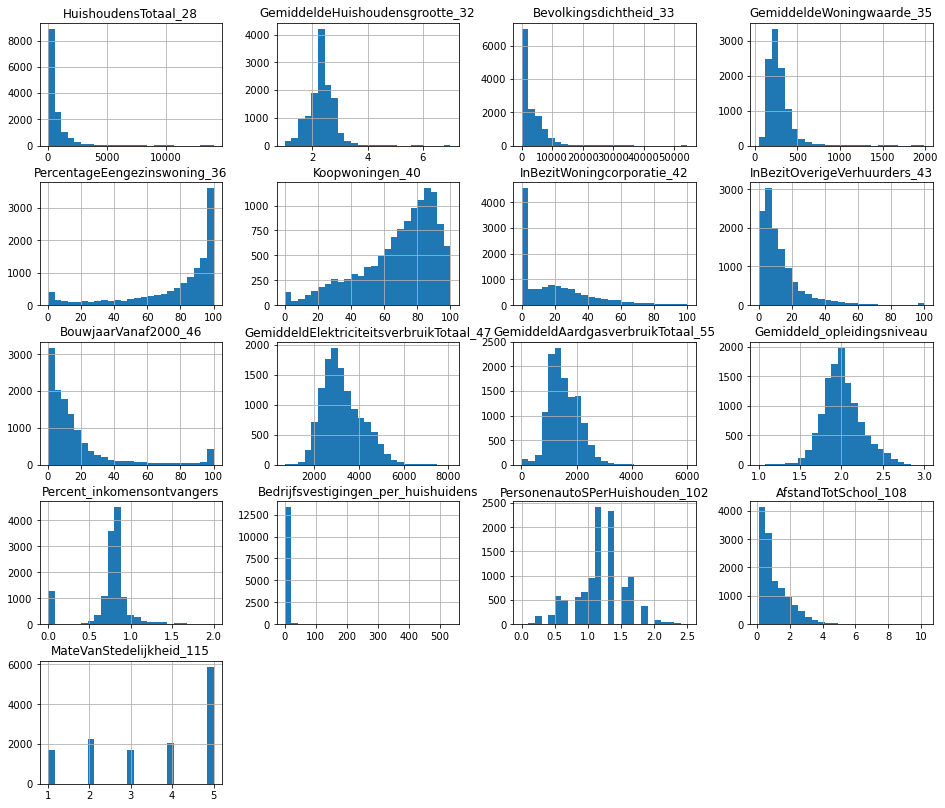

In [57]:
df.drop('Codering_3', axis = 1).hist(bins=25, figsize=(16,14));

### Explore correlations between average energy consumption and other features

Let's explore correlations between features. We will use correlation matrix with Pearson correlation coefficients. The most interesting for our subject is the average consumption of electricity, so the features will be ordered by decreasing correlation with `GemiddeldElektriciteitsverbruikTotaal_47`. 
Note: The dataset contains as well electricity and gas consumption data calculated separately per type of dwellings: Appartement, Tussenwoning, Hoekwoning, Twee-onder-één-kap-woning, Vrijstaande woning, as well as per ownership: Huurwoning and Eigen woning. These differences can be looked into at a later stage.

In [58]:
corr_matrix = df.corr().sort_values(by = 'GemiddeldElektriciteitsverbruikTotaal_47', ascending = False).transpose()
corr_matrix = corr_matrix.sort_values(by = 'GemiddeldElektriciteitsverbruikTotaal_47', ascending = False)

<AxesSubplot:>

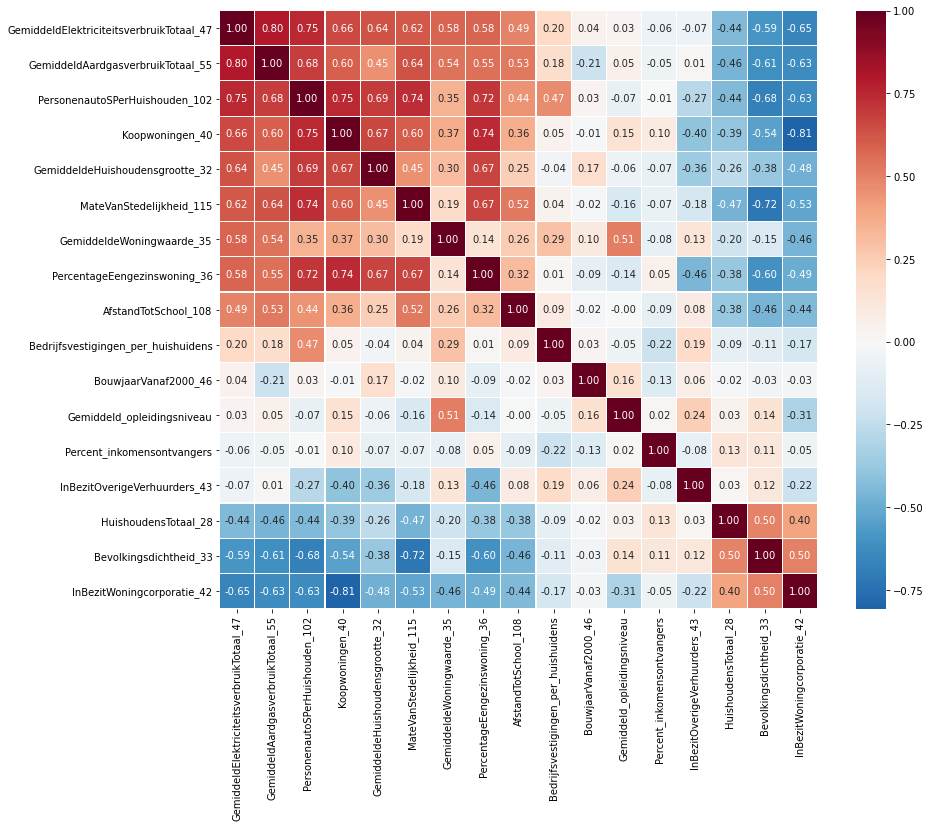

In [59]:
plt.figure(figsize = (14,11))
sns.heatmap(data = corr_matrix, annot = True, fmt='.2f', cmap = 'RdBu_r', linewidths=.1, square=True, vmax=1, center = 0)

Let's focus on the correlation between average electricity consumption and other features. High positive / negative values mean strong positive / negative linear correlation, values close to 0 indicate a weak or non-linear correlation. 

<AxesSubplot:>

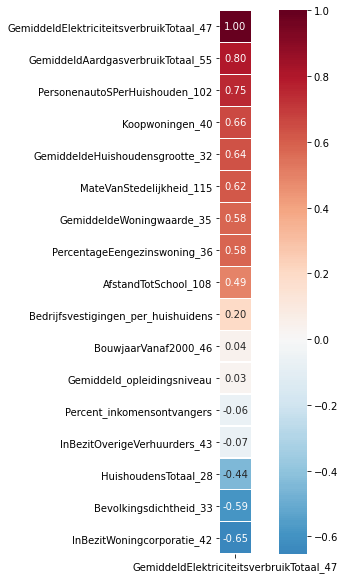

In [60]:
plt.figure(figsize = (10,10))
sns.heatmap(data = corr_matrix[['GemiddeldElektriciteitsverbruikTotaal_47']], 
            annot = True, fmt='.2f', cmap = 'RdBu_r', linewidths=.1, square=True, vmax=1, center = 0)

Finally, let's visualize correlations between each individual numeric feature (on x axes) and average electricity consumption (y axis of each diagram)

In [61]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

IndexError: index 4 is out of bounds for axis 0 with size 4

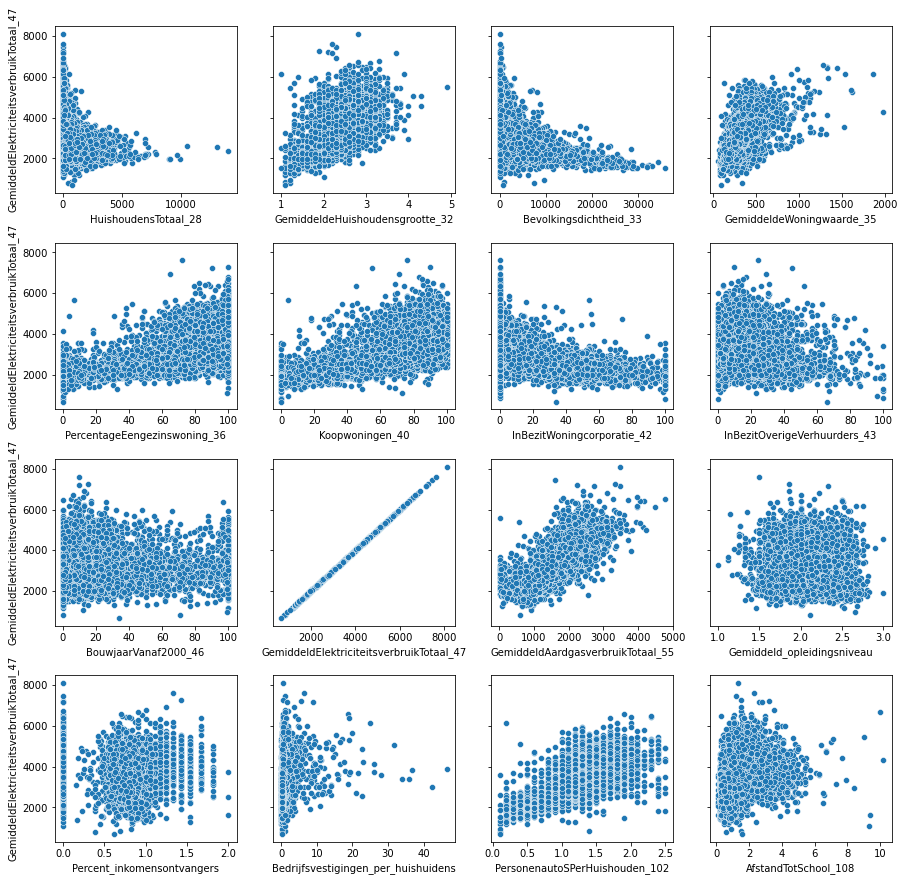

In [62]:
# after the notebook Pima Indians Diabetes © 2020 by Laurence Frank and Daniel Kapitan. 
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html 
fig, ax = plt.subplots(4, 4, figsize=(15,15), sharey=True, gridspec_kw={'hspace': 0.3})
for i, col in enumerate(df_num.columns):
    _ax=ax[i // 4, i % 4]
    sns.scatterplot(x=col, y='GemiddeldElektriciteitsverbruikTotaal_47', data=df_num, ax=_ax)

Finally, we write the dataset to a csv file, so that it can be used as input file in next stages of analysis.

In [ ]:
c_path ="./data/"

In [ ]:
df.to_csv(path_or_buf = c_path + 'CBS_Kerncijfers2019_intermediate_dataset.csv', index = False)

In [ ]:
#nbconvert.PDFExporter('Enexis CBS data EDA v1')